In [58]:
#This notebook uses sort_trials_by_CW_and_CCW()
#This function sorts trial into clockwise and counterclockwise lists based on the change index (+1/-1) of
#the window with the greatest change in head angle direction compared to the other windows in the trial
#if said window's rate is distinct from the second-highest rate and the window is in the first half of the trial

In [59]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
main_copy_dir = os.path.join(parent_dir, "main_copy")
octagon_analysis = os.path.join(parent_dir, "octagon_analysis")
sys.path.append(main_copy_dir)
sys.path.append(octagon_analysis)

print("Added paths to sys.path:", main_copy_dir, octagon_analysis)

Added paths to sys.path: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis


In [60]:
#imports
%load_ext autoreload
%autoreload 2
import scipy
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import plotting.plot_trajectory as plot_trajectory
import plotting.plot_octagon as plot_octagon
import data_extraction.extract_trial as extract_trial
import math
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
from IPython.display import Image, display
import data_extraction.get_indices as get_indices
import prominent_direction_functions as prominent_direction_functions
import flip_rotate_headangle_functions
import headangle_analysis_plotting_functions
import headangle_bin_assignment_new
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import calculate_probabilities_functions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis'

json_filenames_all_social = [r'Json_data/2024-11-19_15-22-56_SophiaHocineSocial.json',
                                r'Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json', 
                                r'Json_data/2024-12-19_15-28-24_JingjingYeungSocial.json', 
                                r'Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json', 
                                r'Json_data/2025-01-15_15-21-27_YixuanMarcoSocial.json',
                                r'Json_data/2024-11-13_14-18-54_NasiaRyanSocial.json', 
                                r'Json_data/2024-11-19_14-24-49_AmyXinyuanSocial.json', 
                                r'Json_data/2024-09-27_14-25-20_SaraEmilySocial.json', 
                                r'Json_data/2024-11-13_15-28-07_YichuanHoiSocial.json', 
                                r'Json_data/2024-11-20_15-16-21_SunnyVinceSocial.json', 
                                r'Json_data/2025-01-15_16-50-13_YuChunSecondSocial.json', 
                                r'Json_data/2024-11-12_15-23-24_FrancescaSenSzeSocial.json', 
                                r'Json_data/2024-10-17_14-28-40_ShamirAbigailSocial.json',
                                r'Json_data/2024-09-13_11-31-00_YansuJerrySocial.json', 
                                r'Json_data/2024-11-20_14-17-44_JasonRahulSocial.json']
 
json_filenames_all_solo = [r'Json_data/2024-12-20_17-36-54_ChristopherFirstSolo.json',
                                r'Json_data/2025-01-15_15-12-39_MarcoFirstSolo.json',
                                r'Json_data/2024-12-19_15-51-33_YeungSecondSolo.json',
                                r'Json_data/2024-11-12_15-44-54_FrancescaSecondSolo.json',
                                r'Json_data/2024-11-12_15-11-45_SenFirstSolo.json',
                                r'Json_data/2024-11-20_15-39-49_VinceSecondSolo.json',
                                r'Json_data/2024-11-19_14-18-18_AmyFirstSolo.json',
                                r'Json_data/2024-11-12_15-45-35_SenSecondSolo.json',
                                r'Json_data/2024-11-12_13-50-23_KhadijaSecondSolo.json',
                                r'Json_data/2024-11-13_15-21-50_HoiFirstSolo.json',
                                r'Json_data/2024-09-13_11-23-37_YansuFirstSolo.json',
                                r'Json_data/2024-11-13_15-22-20_YichuanFirstSolo.json',
                                r'Json_data/2024-11-20_15-10-17_VinceFirstSolo.json',
                                r'Json_data/2025-01-15_16-14-40_YuChunFirstSolo.json',
                                r'Json_data/2024-11-12_13-18-59_WendyFirstSolo.json',
                                r'Json_data/2024-10-17_14-51-22_AbigailSecondSolo.json',
                                r'Json_data/2024-09-13_11-53-56_JerrySecondSolo.json',
                                r'Json_data/2024-09-27_14-14-42_EmilyFirstSolo.json',
                                r'Json_data/2025-01-15_16-50-13_YuChunSecondSolo.json',
                                r'Json_data/2024-11-12_13-50-20_WendySecondSolo.json',
                                r'Json_data/2025-01-15_15-46-04_MarcoSecondSolo.json',
                                r'Json_data/2024-10-17_14-20-50_AbigailFirstSolo.json',
                                r'Json_data/2024-11-13_15-51-39_YichuanSecondSolo.json',
                                r'Json_data/2024-11-20_14-41-56_RahulSecondSolo.json',
                                r'Json_data/2024-10-17_14-20-28_ShamirFirstSolo.json',
                                r'Json_data/2025-01-15_15-47-11_YixuanSecondSolo.json',
                                r'Json_data/2024-11-19_15-15-53_SophiaFirstSolo.json',
                                r'Json_data/2025-01-15_16-50-37_RuiqingSecondSolo.json',
                                r'Json_data/2024-11-20_15-40-08_SunnySecondSolo.json',
                                r'Json_data/2024-09-27_14-14-31_SaraFirstSolo.json',
                                r'Json_data/2024-09-27_14-45-46_EmilySecondSolo.json',
                                r'Json_data/2024-11-12_13-19-22_KhadijaFirstSolo.json',
                                r'Json_data/2024-11-12_15-13-34_FrancescaFirstSolo.json',
                                r'Json_data/2024-11-19_15-47-53_SophiaSecondSolo.json',
                                r'Json_data/2024-11-20_14-12-33_RahulFirstSolo.json',
                                r'Json_data/2024-10-17_14-50-03_ShamirSecondSolo.json',
                                r'Json_data/2024-09-13_11-53-34_YansuSecondSolo.json',
                                r'Json_data/2024-10-17_17-12-29_ElsaSecondSolo.json',
                                r'Json_data/2024-12-19_15-22-13_YeungFirstSolo.json',
                                r'Json_data/2024-12-19_15-51-58_JingjingSecondSolo.json',
                                r'Json_data/2024-11-13_15-51-16_HoiSecondSolo.json',
                                r'Json_data/2024-11-19_14-18-44_XinyuanFirstSolo.json',
                                r'Json_data/2024-12-20_18-06-44_ChristopherSecondSolo.json',
                                r'Json_data/2024-10-17_16-35-45_ElsaFirstSolo.json',
                                r'Json_data/2024-11-20_15-10-00_SunnyFirstSolo.json',
                                r'Json_data/2024-11-19_14-44-31_XinyuanSecondSolo.json',
                                r'Json_data/2024-11-20_14-12-06_JasonFirstSolo.json',
                                r'Json_data/2024-12-20_17-36-27_KirtanFirstSolo.json',
                                r'Json_data/2024-10-17_16-36-0_ZimoFirstSolo.json',
                                r'Json_data/2024-09-27_14-45-55_SaraSecondSolo.json',
                                r'Json_data/2024-10-17_17-11-46_ZimoSecondSolo.json',
                                r'Json_data/2024-12-20_18-06-10_KirtanSecondSolo.json',
                                r'Json_data/2025-01-15_16-14-58_RuiqingFirstSolo.json',
                                r'Json_data/2024-11-19_15-14-19_HocineFirstSolo.json',
                                r'Json_data/2024-11-20_14-42-16_JasonSecondSolo.json',
                                r'Json_data/2024-12-19_15-20-18_JingjingFirstSolo.json',
                                r'Json_data/2024-09-13_11-23-50_JerryFirstSolo.json',
                                r'Json_data/2025-01-15_15-12-13_YixuanFirstSolo.json',
                                r'Json_data/2024-11-19_15-47-29_HocineSecondSolo.json',
                                r'Json_data/2024-11-19_14-44-00_AmySecondSolo.json']

json_filename = r'Json_data/2024-11-12_13-50-23_KhadijaSecondSolo.json'


                             

In [62]:
#prepare solos
dfs, solo_list = prepare_data.prepare_combined_session_data(data_folder, json_filenames_all_solo)

filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-12-20_17-36-54_ChristopherFirstSolo.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2025-01-15_15-12-39_MarcoFirstSolo.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-12-19_15-51-33_YeungSecondSolo.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-12_15-44-54_FrancescaSecondSolo.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-12_15-11-45_SenFirstSolo.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-20_15-39-49_VinceSecondSolo.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-19_14-18-18_AmyFirstSolo

In [63]:
#prepare socials
df, trial_list = prepare_data.prepare_combined_session_data(data_folder, json_filenames_all_social)

filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-19_15-22-56_SophiaHocineSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-12-19_15-28-24_JingjingYeungSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2025-01-15_15-21-27_YixuanMarcoSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-13_14-18-54_NasiaRyanSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-19_14-24-49_AmyXin

In [64]:
CCW_player_0, CW_player_0, discarded_trials = prominent_direction_functions.sort_trials_by_CW_and_CCW(trial_list, 0)

Skipping trial due to insufficient meaningful data: []
Skipping trial due to insufficient meaningful data: [np.float64(0.006594218248442378)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due

In [65]:
len(CCW_player_0)

770

In [66]:
CCW_player_1, CW_player_1, discarded_trials = prominent_direction_functions.sort_trials_by_CW_and_CCW(trial_list, 1)

Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(2.8021476132721762e-11)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
Skipping trial due to insufficient meaningful data: [np.float64(0.0)]
S

In [67]:

#High-Low
trial_list_indices0 = get_indices.get_trials_trialtype(CCW_player_0, trial_type=globals.HIGH_LOW)
trial_list_HL0 = [CCW_player_0[i] for i in trial_list_indices0]

trial_list_indices1 = get_indices.get_trials_trialtype(CCW_player_1, trial_type=globals.HIGH_LOW)
trial_list_HL1 = [CCW_player_1[i] for i in trial_list_indices1]

#45° wall separation
single_wall_sep_trial_indices0 = get_indices.get_trials_with_wall_sep(trial_list_HL0, wall_sep=1)
trial_list_45_HL0 = [trial_list_HL0[i] for i in single_wall_sep_trial_indices0]

single_wall_sep_trial_indices1 = get_indices.get_trials_with_wall_sep(trial_list_HL1, wall_sep=1)
trial_list_45_HL1 = [trial_list_HL1[i] for i in single_wall_sep_trial_indices1]

#90° wall separation
two_wall_sep_trial_indices0 = get_indices.get_trials_with_wall_sep(trial_list_HL0, wall_sep=2)
trial_list_90_HL0 = [trial_list_HL0[i] for i in two_wall_sep_trial_indices0]

two_wall_sep_trial_indices1 = get_indices.get_trials_with_wall_sep(trial_list_HL1, wall_sep=2)
trial_list_90_HL1 = [trial_list_HL1[i] for i in two_wall_sep_trial_indices1]

#90° wall separation
four_wall_sep_trial_indices0 = get_indices.get_trials_with_wall_sep(trial_list_HL0, wall_sep=4)
trial_list_180_HL0 = [trial_list_HL0[i] for i in four_wall_sep_trial_indices0]

four_wall_sep_trial_indices1 = get_indices.get_trials_with_wall_sep(trial_list_HL1, wall_sep=4)
trial_list_180_HL1 = [trial_list_HL1[i] for i in four_wall_sep_trial_indices1]



In [68]:
#take whole trial list and update yaw & trajectory for both players
#45
updated_trial_list_45P0 = flip_rotate_headangle_functions.process_and_update_trials_both_players(trial_list_45_HL0)

In [69]:
updated_trial_list_45P1 = flip_rotate_headangle_functions.process_and_update_trials_both_players(trial_list_45_HL1)

In [70]:
#90
updated_trial_list_90P0 = flip_rotate_headangle_functions.process_and_update_trials_both_players(trial_list_90_HL0)

In [71]:
updated_trial_list_90P1 = flip_rotate_headangle_functions.process_and_update_trials_both_players(trial_list_90_HL1)

In [72]:
#180
updated_trial_list_180P0 = flip_rotate_headangle_functions.process_and_update_trials_both_players(trial_list_180_HL0)

In [73]:
updated_trial_list_180P1 = flip_rotate_headangle_functions.process_and_update_trials_both_players(trial_list_180_HL1)

In [74]:
#bin assignments for the whole trial list
#45
bins_45P0 = headangle_bin_assignment_new.assign_bins_to_all_trials(updated_trial_list_45P0)
bins_45P1 = headangle_bin_assignment_new.assign_bins_to_all_trials(updated_trial_list_45P1)

In [75]:
bins_45_player0 = bins_45P0[0]
bins_45_player1 = bins_45P1[1]
len(bins_45_player1)

113

In [76]:
#90
bins_90P0 = headangle_bin_assignment_new.assign_bins_to_all_trials(updated_trial_list_90P0)
bins_90P1 = headangle_bin_assignment_new.assign_bins_to_all_trials(updated_trial_list_90P1)

In [77]:
bins_90_player0 = bins_90P0[0]
bins_90_player1 = bins_90P1[1]


In [78]:
#180
bins_180P0 = headangle_bin_assignment_new.assign_bins_to_all_trials(updated_trial_list_180P0)
bins_180P1 = headangle_bin_assignment_new.assign_bins_to_all_trials(updated_trial_list_180P1)

In [79]:
bins_180_player0 = bins_180P0[0]
bins_180_player1 = bins_180P1[1]

In [80]:
#get player wall choices from original trial list for both losses and wins
#45
choice_45_player0 = wall_visibility_and_choice.get_player_wall_choice(trial_list_45_HL0, 0, inferred_choice=False, debug=True)
choice_45_player1 = wall_visibility_and_choice.get_player_wall_choice(trial_list_45_HL1, 1, inferred_choice=False, debug=True)

Time taken for player_wall_choice_wins_only (one session for one player) is 0.90
include loser's inferred choice status: False
player wall choices for this player: [ 1.  3.  6. nan  2.  2. nan  7.  4.  5.  7.  8.  7. nan  6.  1.  3. nan
  6.  2.  5.  8. nan  4.  8.  4.  2.  3. nan nan  8. nan  3. nan nan nan
  6. nan  3.  5. nan  3.  6.  1.  6.  1.  6.  1. nan nan nan  1.  1.  1.
 nan  6. nan  8. nan nan  6. nan nan nan nan nan nan nan  5. nan  6.  8.
 nan nan nan  5. nan  8. nan nan nan nan nan  5. nan nan nan  4.  8. nan
 nan nan nan nan nan nan nan nan  7.  1. nan  5. nan nan nan  8.  7.  8.
  5. nan  4.  8. nan  8.  6. nan nan nan  4. nan  5. nan nan nan nan nan
  6.  1.  2. nan nan nan nan nan nan nan nan  6. nan nan  1.  1. nan nan
 nan  7.  4.  7.  4. nan nan nan nan  7. nan nan  1. nan  7.  2. nan  5.
 nan  6.  2.  5.  3.  5.  1. nan  1.  6.  7. nan nan nan nan nan nan nan
 nan  2.  8.  7. nan nan nan  3.  2. nan nan nan  8.  5.  4.  2.  7.  7.
  5.  4.  2.  7.  8.  4.  5.  3. 

In [81]:
#90
choice_90_player0 = wall_visibility_and_choice.get_player_wall_choice(trial_list_90_HL0, 0, inferred_choice=False, debug=True)
choice_90_player1 = wall_visibility_and_choice.get_player_wall_choice(trial_list_90_HL1, 1, inferred_choice=False, debug=True)

Time taken for player_wall_choice_wins_only (one session for one player) is 0.43
include loser's inferred choice status: False
player wall choices for this player: [ 7.  8.  6.  6. nan  5. nan nan nan  6.  3. nan nan nan  3. nan  3. nan
  3. nan  1. nan  4. nan nan  1.  1. nan  4. nan  1.  3. nan  1. nan  1.
  5.  4. nan nan nan  1.  7. nan  7.  3. nan nan nan nan  3.  1. nan nan
 nan  4.  7. nan  8. nan  1.  3. nan nan  5. nan nan  2.  8. nan  3.  2.
  5. nan  2. nan  6.  5.  5. nan  5.  6.  4. nan  8. nan nan  3.  6.  4.
 nan nan  3. nan nan  8. nan nan  5.  8.  6.  8. nan nan nan nan  3.  6.
 nan  1. nan nan  1. nan nan nan nan  2. nan nan nan nan  3. nan nan  3.
 nan nan  8. nan nan  6.  3.  1.  8.  6.  6.  7.  8.  5. nan  7.  4.  4.
  4. nan nan nan nan  2. nan nan nan  3. nan  5.  6. nan  5.  6. nan nan
  5.  3.  2. nan  3.  8. nan  7. nan nan  3. nan nan  4.]
Time taken for player_wall_choice_wins_only (one session for one player) is 0.18
include loser's inferred choice status: 

In [82]:
#180
choice_180_player0 = wall_visibility_and_choice.get_player_wall_choice(trial_list_180_HL0, 0, inferred_choice=False, debug=True)
choice_180_player1 = wall_visibility_and_choice.get_player_wall_choice(trial_list_180_HL1, 1, inferred_choice=False, debug=True)

Time taken for player_wall_choice_wins_only (one session for one player) is 0.42
include loser's inferred choice status: False
player wall choices for this player: [ 2.  5.  7. nan  4.  1.  6.  8. nan nan nan nan nan  8.  6. nan nan nan
  4. nan  5.  8. nan nan  3.  5. nan  4.  5. nan nan  4. nan  5.  5. nan
 nan  4.  1. nan nan nan  4. nan  1. nan nan  1. nan nan nan nan nan nan
 nan nan nan nan  5. nan  7. nan nan  3.  4. nan  6. nan  7.  8. nan nan
  4. nan  7.  7.  8. nan  7.  3. nan nan  4.  6.  4. nan nan  5.  1. nan
 nan nan  4.  2.  2.  5. nan  4. nan nan nan  1. nan  1. nan nan nan nan
  8. nan  7.  6.  6. nan nan nan  3. nan nan nan nan  4. nan nan nan  2.
 nan  4.  3.  5. nan  4.  8.  8.  4. nan nan  8.  2. nan  1. nan nan nan
 nan nan nan  2. nan nan nan nan nan nan nan nan  3. nan nan nan nan nan
 nan  3.  8.  2. nan nan nan  6. nan nan nan nan  5. nan nan nan]
Time taken for player_wall_choice_wins_only (one session for one player) is 0.13
include loser's inferred choice 

In [83]:
#check whether high wall was chosen
#45
high_wall_chosen_45_player0 = get_indices.was_given_wall_chosen(trial_list_45_HL0, choice_45_player0, 0)
high_wall_chosen_45_player1 = get_indices.was_given_wall_chosen(trial_list_45_HL1, choice_45_player1, 0)
print(type(high_wall_chosen_45_player1))

<class 'numpy.ndarray'>


In [84]:
high_wall_chosen_90_player0 = get_indices.was_given_wall_chosen(trial_list_90_HL0, choice_90_player0, 0)
high_wall_chosen_90_player1 = get_indices.was_given_wall_chosen(trial_list_90_HL1, choice_90_player1, 0)

In [85]:
high_wall_chosen_180_player0 = get_indices.was_given_wall_chosen(trial_list_180_HL0, choice_180_player0, 0)
high_wall_chosen_180_player1 = get_indices.was_given_wall_chosen(trial_list_180_HL1, choice_180_player1, 0)

In [86]:
probabilities_45_dict, probabilities_list_45 = calculate_probabilities_functions.calculate_high_wall_probabilities(
    bin_assignments_lists=[bins_45_player1,bins_45_player0], 
    high_wall_chosen_lists=[high_wall_chosen_45_player1,high_wall_chosen_45_player0], 
    debug=True
)

[0.9722222222222222, 0.8918918918918919, 0.5357142857142857, 0.6, 0.8125, 0.8461538461538461, 1.0, 1.0]
Bin 1: 0.97 (True/Total = 35/36)
Bin 2: 0.89 (True/Total = 33/37)
Bin 3: 0.54 (True/Total = 15/28)
Bin 4: 0.60 (True/Total = 9/15)
Bin 5: 0.81 (True/Total = 13/16)
Bin 6: 0.85 (True/Total = 11/13)
Bin 7: 1.00 (True/Total = 23/23)
Bin 8: 1.00 (True/Total = 39/39)


In [87]:
probabilities_90_dict, probabilities_list_90 = calculate_probabilities_functions.calculate_high_wall_probabilities(
    bin_assignments_lists=[bins_90_player1,bins_90_player0], 
    high_wall_chosen_lists=[high_wall_chosen_90_player1,high_wall_chosen_90_player0], 
    debug=True
)

[1.0, 0.9473684210526315, 0.16666666666666666, 0.4117647058823529, 0.3076923076923077, 0.6666666666666666, 0.7692307692307693, 1.0]
Bin 1: 1.00 (True/Total = 25/25)
Bin 2: 0.95 (True/Total = 18/19)
Bin 3: 0.17 (True/Total = 3/18)
Bin 4: 0.41 (True/Total = 7/17)
Bin 5: 0.31 (True/Total = 4/13)
Bin 6: 0.67 (True/Total = 6/9)
Bin 7: 0.77 (True/Total = 10/13)
Bin 8: 1.00 (True/Total = 14/14)


In [88]:
probabilities_180_dict, probabilities_list_180 = calculate_probabilities_functions.calculate_high_wall_probabilities(
    bin_assignments_lists=[bins_180_player1,bins_180_player0], 
    high_wall_chosen_lists=[high_wall_chosen_180_player1,high_wall_chosen_180_player0], 
    debug=True
)

[1.0, 0.9583333333333334, 0.6923076923076923, 0.16666666666666666, 0.10526315789473684, 0.16666666666666666, 0.09090909090909091, 0.9375]
Bin 1: 1.00 (True/Total = 22/22)
Bin 2: 0.96 (True/Total = 23/24)
Bin 3: 0.69 (True/Total = 9/13)
Bin 4: 0.17 (True/Total = 2/12)
Bin 5: 0.11 (True/Total = 2/19)
Bin 6: 0.17 (True/Total = 1/6)
Bin 7: 0.09 (True/Total = 1/11)
Bin 8: 0.94 (True/Total = 15/16)


In [89]:
probabilities_combined, probabilities_combined_list = calculate_probabilities_functions.calculate_high_wall_probabilities(
    bin_assignments_lists=[bins_45_player1,bins_45_player0,bins_90_player1,bins_90_player0,bins_180_player1,bins_180_player0], 
    high_wall_chosen_lists=[high_wall_chosen_45_player1,high_wall_chosen_45_player0,high_wall_chosen_90_player1,high_wall_chosen_90_player0,high_wall_chosen_180_player1,high_wall_chosen_180_player0], 
    debug=True
)

[0.9879518072289156, 0.925, 0.4576271186440678, 0.4090909090909091, 0.3958333333333333, 0.6428571428571429, 0.723404255319149, 0.9855072463768116]
Bin 1: 0.99 (True/Total = 82/83)
Bin 2: 0.93 (True/Total = 74/80)
Bin 3: 0.46 (True/Total = 27/59)
Bin 4: 0.41 (True/Total = 18/44)
Bin 5: 0.40 (True/Total = 19/48)
Bin 6: 0.64 (True/Total = 18/28)
Bin 7: 0.72 (True/Total = 34/47)
Bin 8: 0.99 (True/Total = 68/69)


In [90]:
overall_probability_45 = calculate_probabilities_functions.calculate_p_high(
    bin_assignments_lists=[bins_45_player1,bins_45_player0], 
    high_wall_chosen_lists=[high_wall_chosen_45_player1,high_wall_chosen_45_player0], 
)

In [91]:
print(overall_probability_45)

0.8599033816425121


In [92]:
overall_probability_90 = calculate_probabilities_functions.calculate_p_high(
    bin_assignments_lists=[bins_90_player1,bins_90_player0], 
    high_wall_chosen_lists=[high_wall_chosen_90_player1,high_wall_chosen_90_player0], 
)    

In [93]:
overall_probability_180 = calculate_probabilities_functions.calculate_p_high(
    bin_assignments_lists=[bins_180_player1,bins_180_player0], 
    high_wall_chosen_lists=[high_wall_chosen_180_player1,high_wall_chosen_180_player0], 
)

In [94]:
overall_probability_combined = calculate_probabilities_functions.calculate_p_high(
    bin_assignments_lists=[bins_45_player1,bins_45_player0,bins_90_player1,bins_90_player0,bins_180_player1,bins_180_player0], 
    high_wall_chosen_lists=[high_wall_chosen_45_player1,high_wall_chosen_45_player0,high_wall_chosen_90_player1,high_wall_chosen_90_player0,high_wall_chosen_180_player1,high_wall_chosen_180_player0]
)
print(overall_probability_combined)

0.74235807860262


In [95]:
#obtain difference between p(H) given bin and average p(H)
new_probabilities_list_45 = [probability - overall_probability_45 for probability in probabilities_list_45]
new_probabilities_list_90 = [probability - overall_probability_90 for probability in probabilities_list_90]
new_probabilities_list_180 = [probability - overall_probability_180 for probability in probabilities_list_180]
new_probabilities_list_combined = [probability - overall_probability_combined for probability in probabilities_combined_list]


In [96]:
bin_ranges = headangle_bin_assignment_new.define_45_degree_bins()
print(bin_ranges)

[(np.float64(5.8904862254808625), np.float64(0.3926990816987242)), (np.float64(0.39269908169872414), np.float64(1.1780972450961724)), (np.float64(1.1780972450961726), np.float64(1.963495408493621)), (np.float64(1.9634954084936211), np.float64(2.7488935718910694)), (np.float64(2.748893571891069), np.float64(3.5342917352885173)), (np.float64(3.5342917352885173), np.float64(4.319689898685965)), (np.float64(4.319689898685965), np.float64(5.105088062083414)), (np.float64(5.105088062083414), np.float64(5.890486225480862))]


(2, 8)


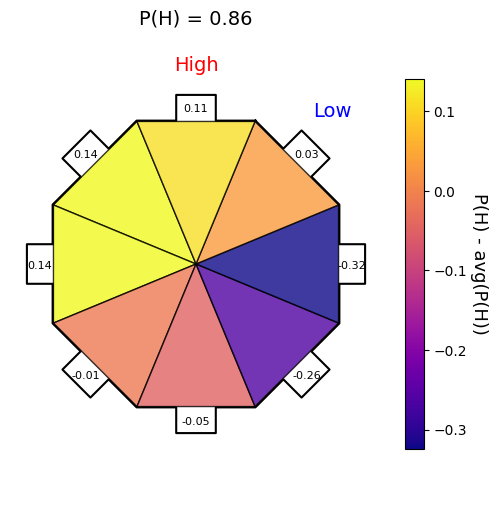

[0.11231884057971009, 0.031988510249379765, -0.3241890959282264, -0.25990338164251214, -0.04740338164251212, -0.013749535488665976, 0.14009661835748788, 0.14009661835748788]


In [97]:
#45
#plot color gradient octagon for new ratios list

fig, ax = plt.subplots(figsize=(6, 6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#define ratios list
#probabilities_list_reversed = probabilities_list[::-1]

#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, new_probabilities_list_45)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list_45)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center2_x, alcove_center2_y = alcove_centers[:,1]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center2_x + 3, alcove_center2_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(new_probabilities_list_45), vmin=min(new_probabilities_list_45)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_prob_45 = round(overall_probability_45, 2)
plt.title(f"P(H) = {rounded_prob_45}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print(new_probabilities_list_45)

(2, 8)


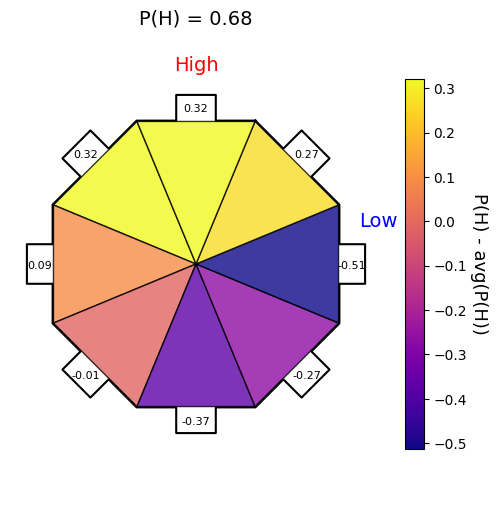

[0.3203125, 0.2676809210526315, -0.5130208333333334, -0.2679227941176471, -0.3719951923076923, -0.01302083333333337, 0.08954326923076927, 0.3203125]


In [98]:
#90
#plot color gradient octagon for new ratios list

fig, ax = plt.subplots(figsize=(6, 6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#define ratios list
#probabilities_list_reversed = probabilities_list[::-1]

#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, new_probabilities_list_90)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list_90)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center3_x, alcove_center3_y = alcove_centers[:,2]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center3_x + 3, alcove_center3_y + 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(new_probabilities_list_90), vmin=min(new_probabilities_list_90)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_prob_90 = round(overall_probability_90, 2)
plt.title(f"P(H) = {rounded_prob_90}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print(new_probabilities_list_90)

(2, 8)


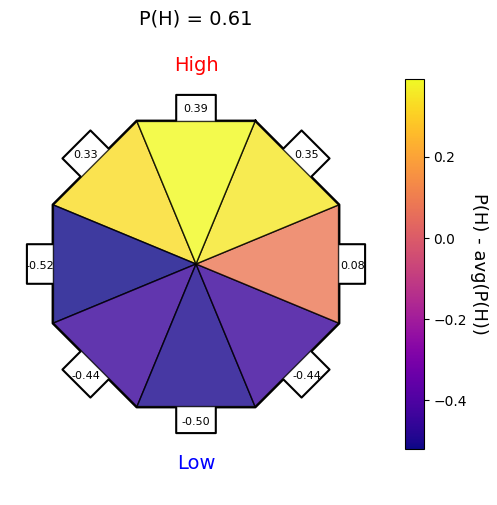

[0.3902439024390244, 0.3485772357723578, 0.0825515947467167, -0.44308943089430897, -0.5044929396662388, -0.44308943089430897, -0.5188470066518847, 0.3277439024390244]


In [99]:
#180
#plot color gradient octagon for new ratios list

fig, ax = plt.subplots(figsize=(6, 6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#define ratios list
#probabilities_list_reversed = probabilities_list[::-1]

#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, new_probabilities_list_180)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list_180)

#add wall labels
alcove_centers = plot_octagon.return_alcove_centre_points()

alcove_center1_x, alcove_center1_y = alcove_centers[:,0]
alcove_center4_x, alcove_center4_y = alcove_centers[:,4]

ax.text(alcove_center1_x, alcove_center1_y + 5, f'{"High"}', 
                ha='center', va='center', fontsize=14, color='Red')
ax.text(alcove_center4_x, alcove_center4_y - 5, f'{"Low"}', 
                ha='center', va='center', fontsize=14, color='Blue')

#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(new_probabilities_list_180), vmin=min(new_probabilities_list_180)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_prob_180 = round(overall_probability_180, 2)
plt.title(f"P(H) = {rounded_prob_180}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print(new_probabilities_list_180)

(2, 8)


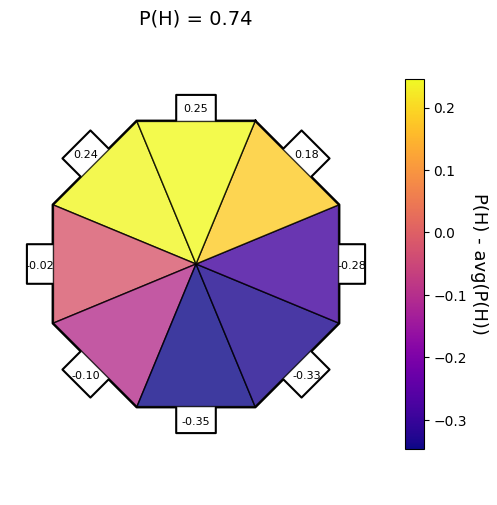

[0.24559372862629558, 0.18264192139738, -0.28473095995855224, -0.3332671695117109, -0.3465247452692867, -0.09950093574547714, -0.01895382328347106, 0.2431491677741916]


In [100]:
#combined
#plot color gradient octagon for new ratios list

fig, ax = plt.subplots(figsize=(6, 6))

#plot octagon
ax = plot_octagon.plot_octagon(ax=ax)

#define bin_ranges
bin_ranges = bin_ranges


#define ratios list
#probabilities_list_reversed = probabilities_list[::-1]

#color the segments of the octagon
ax = headangle_analysis_plotting_functions.plot_colored_octagon(ax, bin_ranges, new_probabilities_list_combined)

#plot the ratios under the alcoves
ax = headangle_analysis_plotting_functions.plot_ratios_under_alcoves(ax, new_probabilities_list_combined)


#add a colorbar for reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmax=max(new_probabilities_list_combined), vmin=min(new_probabilities_list_combined)))
sm.set_array([])  # Only necessary for ScalarMappable
cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label("P(H) - avg(P(H))", fontsize=13, rotation=270, labelpad=15)

rounded_prob = round(overall_probability_combined, 2)
plt.title(f"P(H) = {rounded_prob}", fontsize=14)
plt.axis('equal')
plt.axis('off')
plt.show()
print(new_probabilities_list_combined)